In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Environment Datasets

### Loading the dataset constructed as presented in the notebook WeatherTideDigitalTwinDatasetCreation
### combining data from https://power.larc.nasa.gov/data-access-viewer/ and https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/uk_tide_gauge_network/processed/#MyRequest

In [2]:
data_dr = "./data/"

In [3]:
ds_env = pd.read_csv(data_dr+"WeatherTide_digitaltwin_1h.csv")

# Pollution Dataset

## Loading the dataset constructed in PollutionDigitalTwinDatasetCreation

In [4]:
df_poll = pd.read_csv(data_dr+"Pollution_1h.csv")

## Combining the environment and pollution digital twin for the Portsmouth harbour

In [5]:
ds_env.head()

,date,ALLSKY_KT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,value,error
0,2001-01-01 00:00:00,-999.0,0.0,0.0,0.0,9.87,7.14,0.51,99.01,14.65,185.78,18.14,188.02,3.46275,0.56225
1,2001-01-01 01:00:00,-999.0,0.0,0.0,0.0,10.45,7.45,0.23,98.94,13.76,187.93,17.23,189.74,4.09650,0.51400
2,2001-01-01 02:00:00,-999.0,0.0,0.0,0.0,10.75,7.63,0.47,98.88,12.99,188.89,16.42,190.39,4.47800,0.39975
3,2001-01-01 03:00:00,-999.0,0.0,0.0,0.0,11.05,7.75,1.04,98.85,13.32,195.02,16.85,196.54,4.37225,0.18425
4,2001-01-01 04:00:00,-999.0,0.0,0.0,0.0,11.29,7.81,0.41,98.86,12.63,202.79,16.02,203.85,4.18950,0.11525


In [6]:
df_poll.head()

,Unnamed: 0,date,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,...,Non-volatile PM2.5 (Hourly measured),PM2.5 particulate matter (Hourly measured),Volatile PM10 (Hourly measured),Volatile PM2.5 (Hourly measured),PM<sub>10</sub> particulate matter (Hourly measured),Non-volatile PM<sub>10</sub> (Hourly measured),Non-volatile PM<sub>2.5</sub> (Hourly measured),PM<sub>2.5</sub> particulate matter (Hourly measured),Volatile PM<sub>10</sub> (Hourly measured),Volatile PM<sub>2.5</sub> (Hourly measured)
0,0,2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# join environment and pollution twins

In [7]:
df_e_p = pd.merge(ds_env, df_poll, on="date", how="outer")

df_e_p = df_e_p.sort_values("date").reset_index(drop=True)

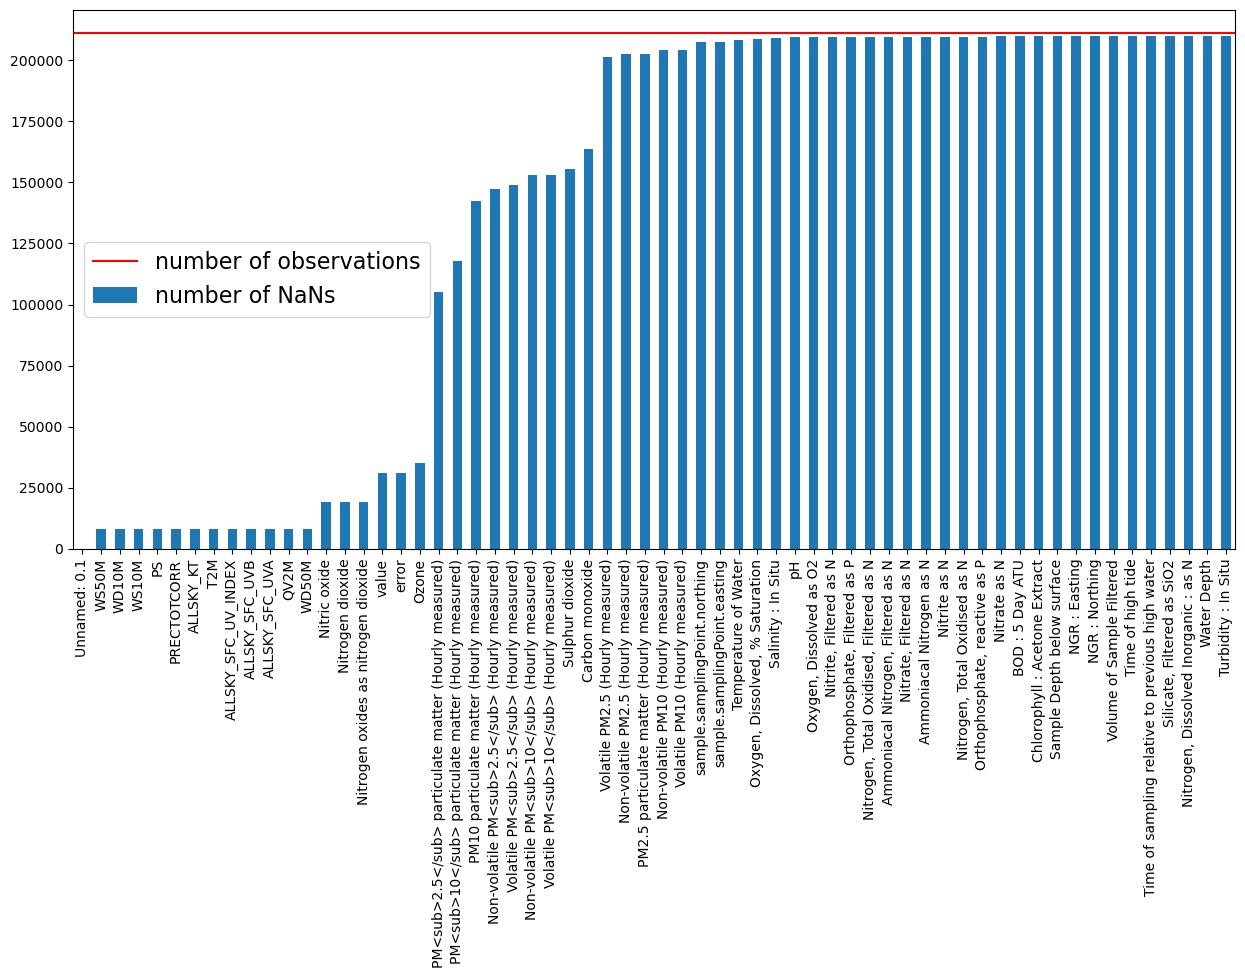

In [8]:
missing = df_e_p.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(15, 7))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=df_e_p.shape[0], color="red", label="number of observations")
plt.legend(fontsize=16)
plt.show()

In [9]:
set(df_e_p.columns)

{'ALLSKY_KT',
 'ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB',
 'ALLSKY_SFC_UV_INDEX',
 'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'BOD : 5 Day ATU',
 'Carbon monoxide',
 'Chlorophyll : Acetone Extract',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitric oxide',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen dioxide',
 'Nitrogen oxides as nitrogen dioxide',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Non-volatile PM10 (Hourly measured)',
 'Non-volatile PM2.5 (Hourly measured)',
 'Non-volatile PM<sub>10</sub> (Hourly measured)',
 'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Ozone',
 'PM10 particulate matter (Hourly measured)',
 'PM2.5 particulate matter (Hourly measured)',
 'PM<sub>10</sub> particulate matter (Hou

In [10]:
subset_columns = [
 'Carbon monoxide',
 'Nitric oxide',
 'Nitrogen dioxide',
 'Nitrogen oxides as nitrogen dioxide',  'Ozone', 'PRECTOTCORR',
 'PS',
 'QV2M',
 'Sulphur dioxide', 'T2M', 'WD10M',
 'WD50M',
 'WS10M',
 'WS50M','value',
     'Nitrate as N',
 'Nitrite as N',
 'Nitrogen dioxide',
 'Orthophosphate, Filtered as P',
 'Oxygen, Dissolved as O2',
 'Salinity : In Situ',
 'pH',
 'Temperature of Water',


]

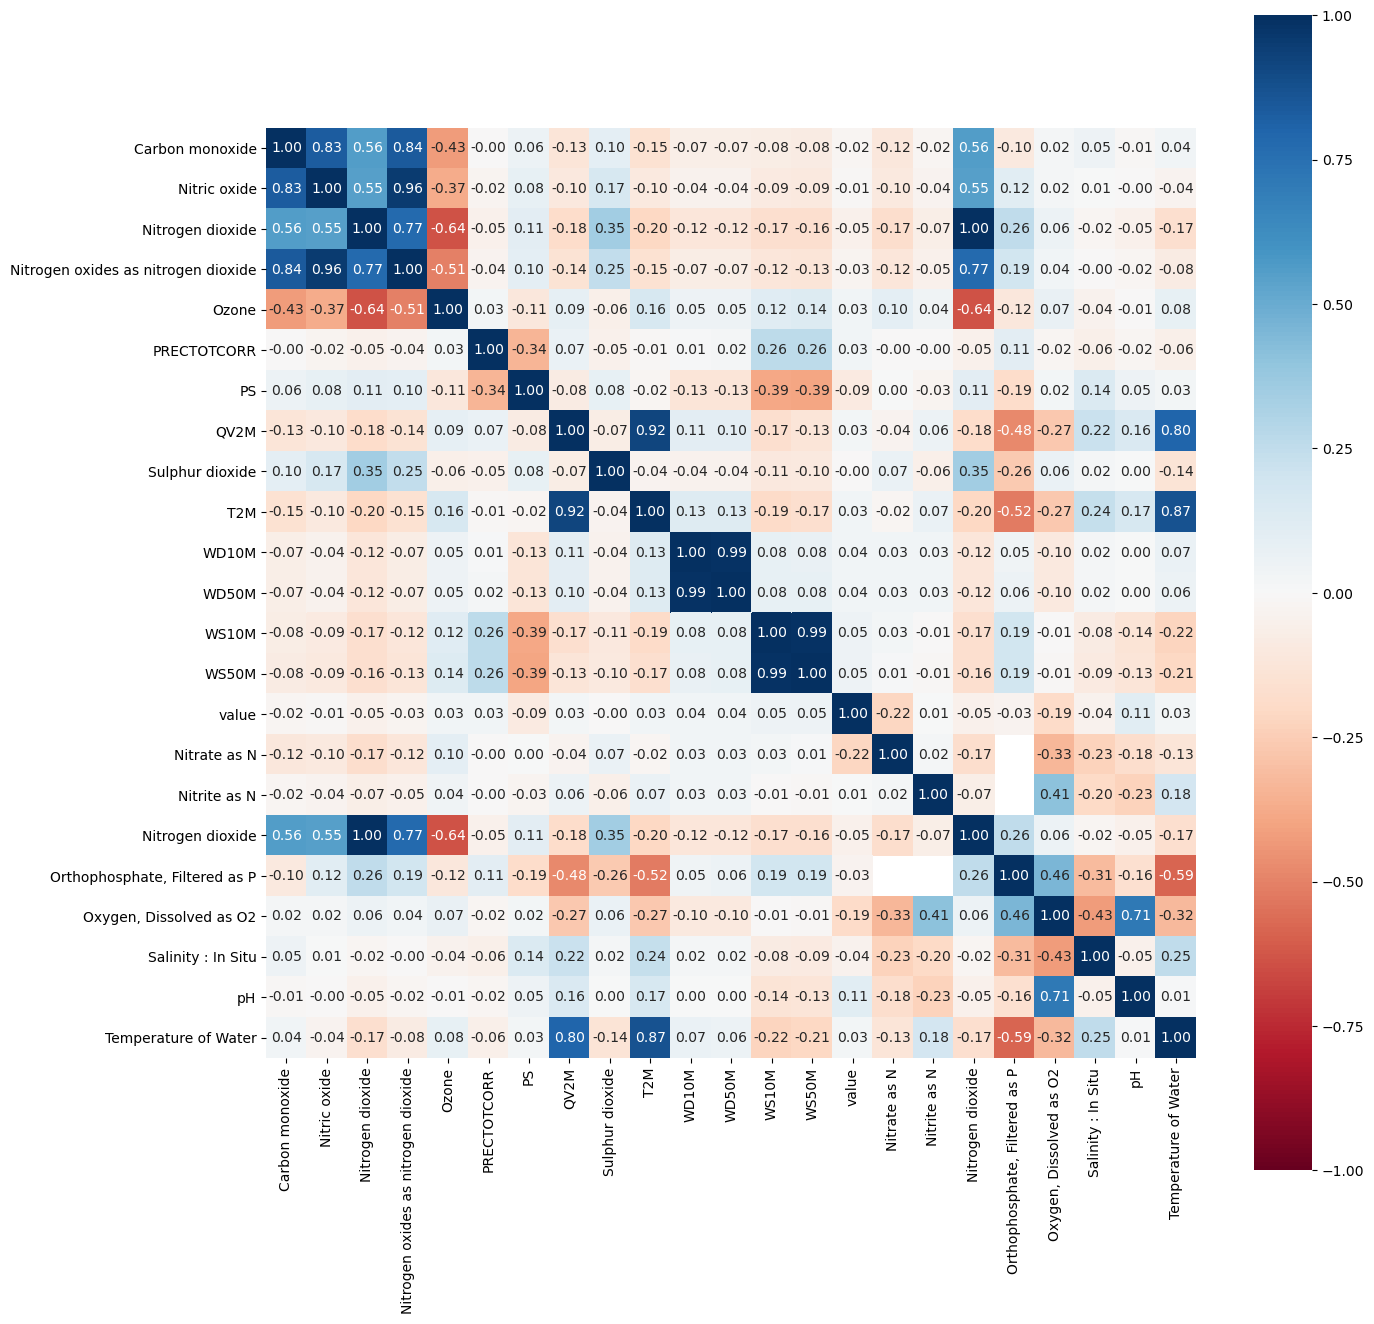

In [11]:
corrmat = df_e_p[subset_columns].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

In [12]:
df_e_p.to_csv(data_dr+"Env_Poll.csv")